# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/arturs/Python_stuff/anaconda3/envs/dog-project/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

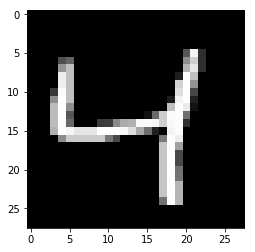

In [9]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [16]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# AE number of pixels in an image
number_of_pixels = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, number_of_pixels])
targets_ = tf.placeholder(tf.float32, [None, number_of_pixels])

# Output of hidden layer, single fully connected layer here with ReLU activation
# AE - so the hidden layer really:
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, number_of_pixels)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [17]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [18]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6858
Epoch: 1/20... Training loss: 0.6814
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6707
Epoch: 1/20... Training loss: 0.6598
Epoch: 1/20... Training loss: 0.6537
Epoch: 1/20... Training loss: 0.6459
Epoch: 1/20... Training loss: 0.6318
Epoch: 1/20... Training loss: 0.6179
Epoch: 1/20... Training loss: 0.6054
Epoch: 1/20... Training loss: 0.5865
Epoch: 1/20... Training loss: 0.5746
Epoch: 1/20... Training loss: 0.5569
Epoch: 1/20... Training loss: 0.5403
Epoch: 1/20... Training loss: 0.5219
Epoch: 1/20... Training loss: 0.5082
Epoch: 1/20... Training loss: 0.4874
Epoch: 1/20... Training loss: 0.4638
Epoch: 1/20... Training loss: 0.4474
Epoch: 1/20... Training loss: 0.4306
Epoch: 1/20... Training loss: 0.4193
Epoch: 1/20... Training loss: 0.4136
Epoch: 1/20... Training loss: 0.3953
Epoch: 1/20... Training loss: 0.3798
Epoch: 1/20... Training loss: 0.3680
E

Epoch: 1/20... Training loss: 0.2034
Epoch: 1/20... Training loss: 0.2030
Epoch: 1/20... Training loss: 0.2081
Epoch: 1/20... Training loss: 0.2051
Epoch: 1/20... Training loss: 0.2064
Epoch: 1/20... Training loss: 0.2085
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.2095
Epoch: 1/20... Training loss: 0.2041
Epoch: 1/20... Training loss: 0.2076
Epoch: 1/20... Training loss: 0.2071
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.2004
Epoch: 1/20... Training loss: 0.2110
Epoch: 1/20... Training loss: 0.2222
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.2068
Epoch: 1/20... Training loss: 0.2070
Epoch: 1/20... Training loss: 0.2096
Epoch: 1/20... Training loss: 0.2006
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.2150
Epoch: 1/20... Training loss: 0.2054
Epoch: 1/20... Training loss: 0.2144
Epoch: 1/20... Training loss: 0.2048
Epoch: 1/20... Training loss: 0.2059
Epoch: 1/20... Training loss: 0.1905
E

Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1701
Epoch: 2/20... Training loss: 0.1690
Epoch: 2/20... Training loss: 0.1710
Epoch: 2/20... Training loss: 0.1714
Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1705
Epoch: 2/20... Training loss: 0.1730
Epoch: 2/20... Training loss: 0.1688
Epoch: 2/20... Training loss: 0.1694
Epoch: 2/20... Training loss: 0.1668
Epoch: 2/20... Training loss: 0.1707
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1732
Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1696
E

Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1497
Epoch: 3/20... Training loss: 0.1478
Epoch: 3/20... Training loss: 0.1496
Epoch: 3/20... Training loss: 0.1465
Epoch: 3/20... Training loss: 0.1512
Epoch: 3/20... Training loss: 0.1497
Epoch: 3/20... Training loss: 0.1493
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1482
Epoch: 3/20... Training loss: 0.1468
Epoch: 3/20... Training loss: 0.1508
Epoch: 3/20... Training loss: 0.1510
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1526
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1538
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1508
Epoch: 3/20... Training loss: 0.1495
Epoch: 3/20... Training loss: 0.1493
Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1485
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1514
E

Epoch: 4/20... Training loss: 0.1347
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1419
Epoch: 4/20... Training loss: 0.1372
Epoch: 4/20... Training loss: 0.1339
Epoch: 4/20... Training loss: 0.1365
Epoch: 4/20... Training loss: 0.1363
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1396
Epoch: 4/20... Training loss: 0.1328
Epoch: 4/20... Training loss: 0.1363
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1332
Epoch: 4/20... Training loss: 0.1372
Epoch: 4/20... Training loss: 0.1367
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1379
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1339
Epoch: 4/20... Training loss: 0.1344
Epoch: 4/20... Training loss: 0.1339
Epoch: 4/20... Training loss: 0.1318
E

Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1225
E

Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1202
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1097
E

Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1127
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1114
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1124
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1059
E

Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1103
Epoch: 7/20... Training loss: 0.1091
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1113
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1100
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1098
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1078
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0996
E

Epoch: 9/20... Training loss: 0.1033
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1010
E

Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0999
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0900
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0878
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0992
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0994
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0993
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0882
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

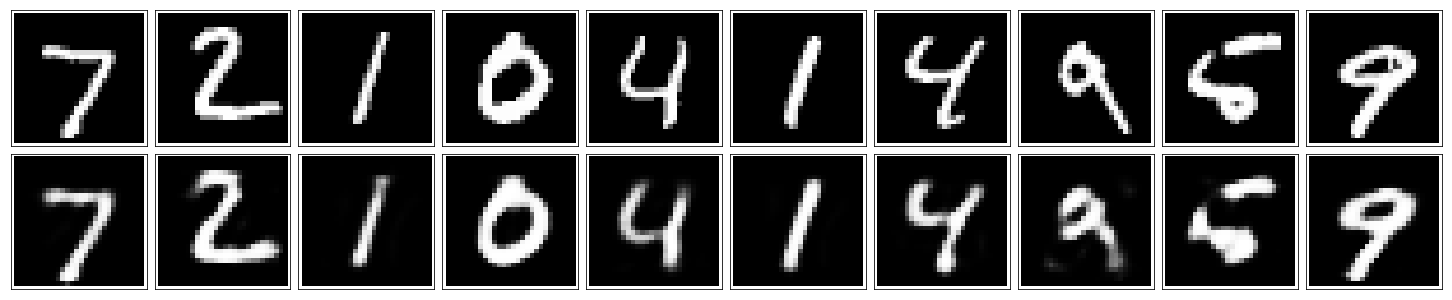

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [20]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.